<a href="https://colab.research.google.com/github/robisz1911/Analysis-of-TFT-game-results/blob/main/visualization_for_TFT_game_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import math
import requests
 
def get_number_of_matches_played(URL):
  URL_tmp = URL
  page = requests.get(URL_tmp)
  soup = BeautifulSoup(page.content, 'html.parser')
  results = soup.find(id="wrapper")
  job_elems = results.find_all('div', class_="profile__match-history-v2")
  return int(str(job_elems).split('(')[1].split(' ')[0])
 
def get_number_of_pages(number_of_matches):
  return int((int(math.ceil(number_of_matches / 10.0)) * 10)/10)
 
def get_list_of_games(URL):
  list_of_games = []
  number_of_matches = get_number_of_matches_played(URL)
  number_of_pages = get_number_of_pages(number_of_matches)
  for i in range(1,number_of_pages+1):
      URL_tmp = URL+str(i)+'/'
      page = requests.get(URL_tmp)
      soup = BeautifulSoup(page.content, 'html.parser')
      results = soup.find(id="wrapper")
      job_elems = results.find_all('div', class_="placement")
      for job_elem in job_elems:
        list_of_games.append(int(str(job_elem).split('#')[1][0]))
  return list_of_games[::-1]

def moving_average(y_axis,x):
  moving_average = []
  for element in range(x,len(y_axis)):
    moving_average.append(np.sum(y_axis[element-x:element+x])/(2*x))
  return moving_average
 
def atlag(y_axis):
  sum = 0
  average_at_time = []
  for position, element in enumerate(y_axis):
    sum += element
    average_at_time.append(sum/(position+1))
  return average_at_time

def to_dict(sequence):
  positions_dict = {}
  for i in range(8):
    positions_dict[str(i+1)] = 0
  for element in sequence:
    positions_dict[str(element)] += 1
  return positions_dict

def plot(positions_dict, results_list, player_name):
  helyezesek = ['First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth']
  title_zero_part = "Player username: " + player_name + '\n'
  title_first_part = "Total games played = "+str(len(results_list))
  title_second_part = ""
  for pos, elem in enumerate(helyezesek):
    title_second_part += elem + ": " + str(positions_dict[str(pos+1)]) + ", "

  title_third_part = "Win rate = " + str(positions_dict['1']/len(results_list)) + '%'
  title_fourth_part = "Top4 = " + str((positions_dict['1']+positions_dict['2']+positions_dict['3']+positions_dict['4'])/len(results_list)) + '%'
  title = title_zero_part + title_first_part + "\n" + title_second_part + "\n" + title_third_part + "\n" + title_fourth_part

  x_axis = []
  y_axis = []
  for position, element in enumerate(results_list):
    x_axis.append(int(position))
    y_axis.append(int(element))
  fig = plt.figure(figsize=(30, 12))
  ax = plt.axes()
  ax.scatter(x_axis, y_axis, linewidth=4, label="Game results")
  ax.plot(x_axis, y_axis, linewidth=0.3)
  ax.plot(x_axis[3:],moving_average(y_axis,3), linewidth=3, label="Moving average 3")
  ax.plot(x_axis[5:],moving_average(y_axis,5), linewidth=3, label="Moving average 5")
  ax.plot(x_axis,atlag(y_axis), linewidth=3, label="Average result of all past games")
  plt.title(title, fontsize=25, loc='left')
  plt.ylim([0, 10])
  helyezesek_axis = ['','First', 'Second', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Seventh', 'Eighth','','']
  ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10])
  ax.set_yticklabels(helyezesek_axis)
  ax.legend(loc='upper left', frameon=False, prop={'size': 18})

def visualization_for_tft_games(results_list, player_name):
  results_dict = to_dict(results_list)
  plot(results_dict, results_list, player_name)


def run_analysis(player_name):
  URL1 = 'https://lolchess.gg/profile/eune/'
  URL2 = '/s4.5/matches/ranked/'
  player_name = player_name.lower()
  URL = URL1 + player_name + URL2 
  game_results = get_list_of_games(URL)
  visualization_for_tft_games(game_results, player_name)

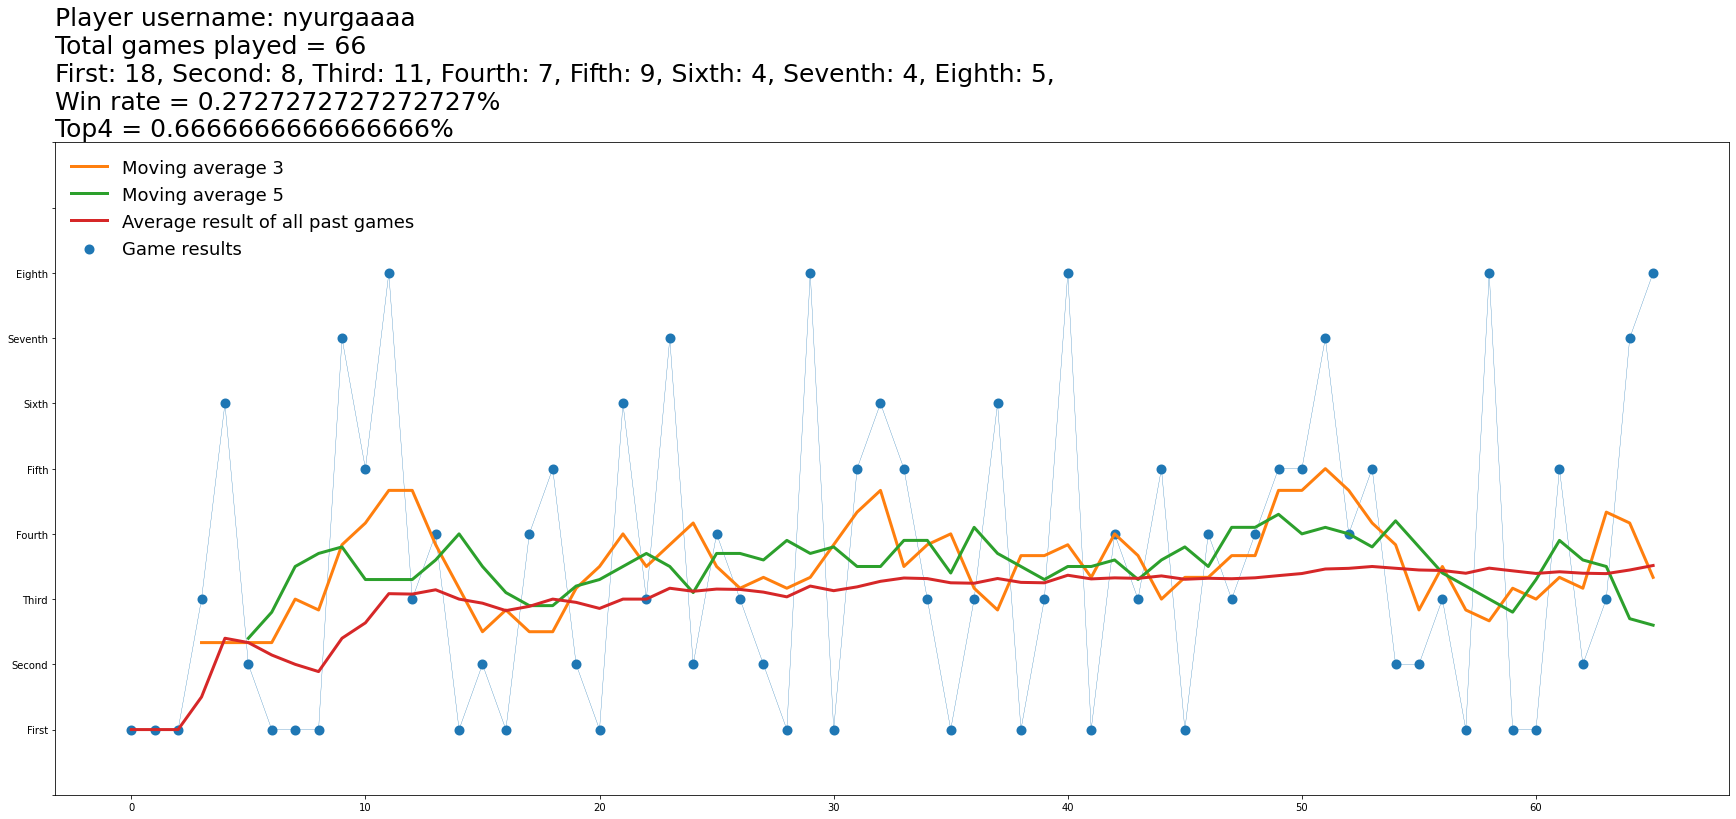

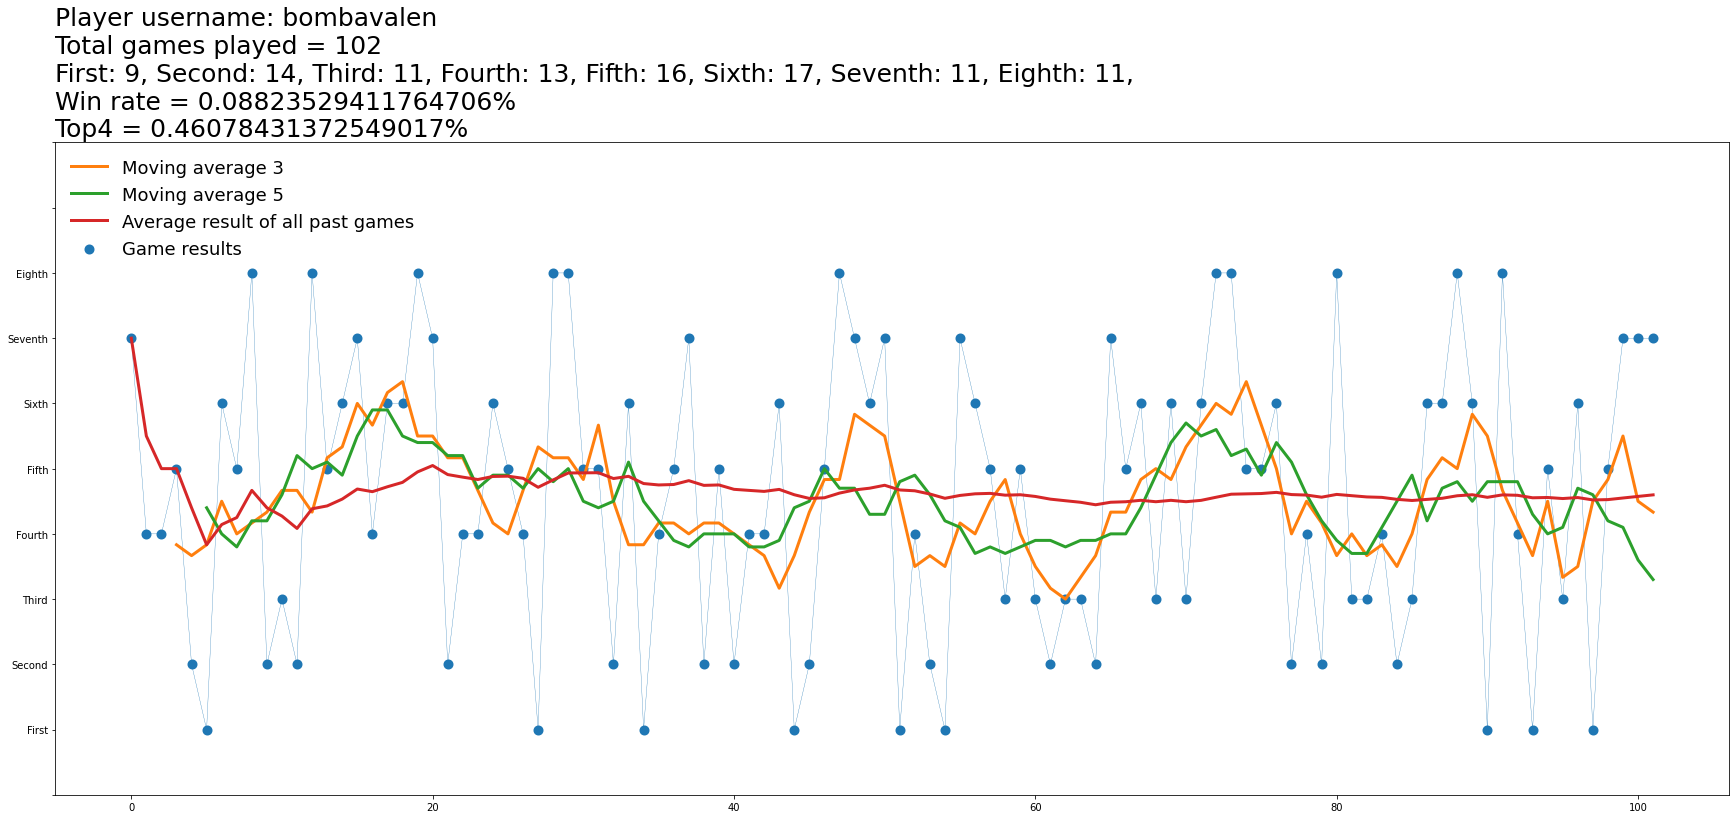

In [11]:
name_1 = 'nyurgaaaa' # try it with any valid username
name_2 ='bombavalen'
run_analysis(name_1)
run_analysis(name_2)

The code above is not optimalized!!

Future plan is to avoid webscrapping, and use RiotGame's API.

This would speed up the process by a huge margin.